<a href="https://colab.research.google.com/github/Sergio-Tolaba/Data_Science_challenge_1/blob/main/ds_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
import plotly.express as px

# Unir todos los DataFrames
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear el mapa interactivo con plotly
fig = px.scatter_geo(
    df_all,
    lat='lat',
    lon='lon',
    color='Precio',
    size='Precio',
    hover_name='Producto',
    hover_data=['Categoría del Producto', 'Lugar de Compra', 'Precio'],
    color_continuous_scale='Viridis',
    projection='natural earth',
    title='Mapa interactivo de ventas por tienda (según precio)'
)

fig.update_layout(geo=dict(scope='south america', showland=True, landcolor='whitesmoke'))

# Mostrar el mapa
fig.show()


#1. Análisis de facturación



In [ ]:
# Cálculo de los ingresos por cada tienda
ingresos_tienda = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Creo un diccionario con la información anterior:
ingresos = {
    'Tienda': ingresos_tienda,
    'Tienda 2': ingresos_tienda2,
    'Tienda 3': ingresos_tienda3,
    'Tienda 4': ingresos_tienda4
}

# Lazo for para recorrer el diccionario, aplicación del método dict.items() y presentar la información
for nombre_tienda, ingresos in ingresos.items():
    if nombre_tienda == 'Tienda':
        print(f"Informe facturación=>{nombre_tienda}  : es de  ${ingresos} de Ingresos Totales")
    else:
      print(f"Informe facturación=>{nombre_tienda}: es de  ${ingresos} de Ingresos Totales")




Informe facturación=>Tienda  : es de  $1150880400.0 de Ingresos Totales
Informe facturación=>Tienda 2: es de  $1116343500.0 de Ingresos Totales
Informe facturación=>Tienda 3: es de  $1098019600.0 de Ingresos Totales
Informe facturación=>Tienda 4: es de  $1038375700.0 de Ingresos Totales


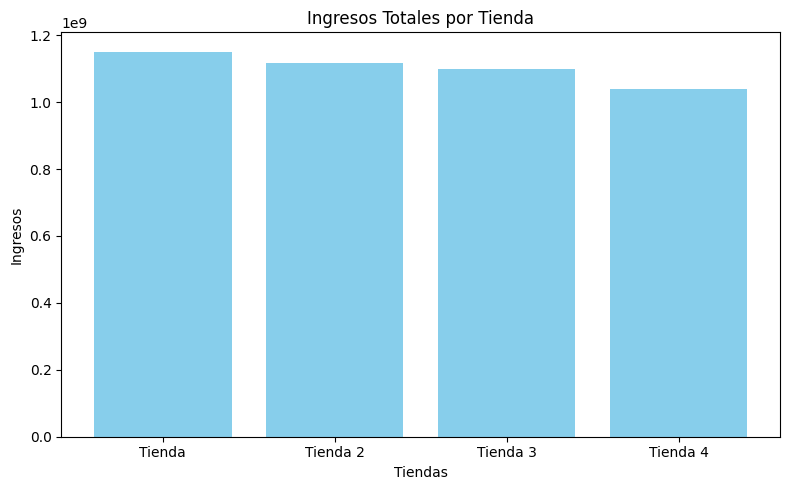

In [ ]:
import matplotlib.pyplot as plt
# Gráfico: ingresos por tienda
nombres_tiendas = ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_valores = [ingresos_tienda, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_valores, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Cálculo de ventas por categoría - Tienda
categorias = tienda["Categoría del Producto"].tolist()
precios = tienda["Precio"].tolist()

ventas_por_categoria = {}

for i in range(len(categorias)):
    categoria = categorias[i]
    precio = precios[i]
    if categoria in ventas_por_categoria:
        ventas_por_categoria[categoria] += precio
    else:
        ventas_por_categoria[categoria] = precio

print("Ventas por Categoría - Tienda:\n")
for categoria, total in ventas_por_categoria.items():
    print(f"{categoria}: ${int(total)}")
categoria_max = max(ventas_por_categoria, key=ventas_por_categoria.get)
monto_max = ventas_por_categoria[categoria_max]

print(f"\nCategoría con más ventas: {categoria_max} (${int(monto_max)})")


# Cálculo de ventas por categoría - Tienda 2
categorias2 = tienda2["Categoría del Producto"].tolist()
precios2 = tienda2["Precio"].tolist()

ventas_por_categoria2 = {}

for i in range(len(categorias2)):
    categoria = categorias2[i]
    precio = precios2[i]
    if categoria in ventas_por_categoria2:
        ventas_por_categoria2[categoria] += precio
    else:
        ventas_por_categoria2[categoria] = precio

print("\nVentas por Categoría - Tienda 2:\n")
for categoria, total in ventas_por_categoria2.items():
    print(f"{categoria}: ${int(total)}")
categoria_max2 = max(ventas_por_categoria2, key=ventas_por_categoria2.get)
monto_max2 = ventas_por_categoria2[categoria_max]

print(f"\nCategoría con más ventas: {categoria_max2} (${int(monto_max2)})")



# Cálculo de ventas por categoría - Tienda 3
categorias3 = tienda3["Categoría del Producto"].tolist()
precios3 = tienda3["Precio"].tolist()

ventas_por_categoria3 = {}

for i in range(len(categorias3)):
    categoria = categorias3[i]
    precio = precios3[i]
    if categoria in ventas_por_categoria3:
        ventas_por_categoria3[categoria] += precio
    else:
        ventas_por_categoria3[categoria] = precio

print("\nVentas por Categoría - Tienda 3:\n")
for categoria, total in ventas_por_categoria3.items():
    print(f"{categoria}: ${int(total)}")
categoria_max3 = max(ventas_por_categoria3, key=ventas_por_categoria3.get)
monto_max3 = ventas_por_categoria3[categoria_max]

print(f"\nCategoría con más ventas: {categoria_max3} (${int(monto_max3)})")


# Cálculo de ventas por categoría - Tienda 4
categorias4 = tienda4["Categoría del Producto"].tolist()
precios4 = tienda4["Precio"].tolist()

ventas_por_categoria4 = {}

for i in range(len(categorias4)):
    categoria = categorias4[i]
    precio = precios4[i]
    if categoria in ventas_por_categoria4:
        ventas_por_categoria4[categoria] += precio
    else:
        ventas_por_categoria4[categoria] = precio

print("\nVentas por Categoría - Tienda 4:\n")
for categoria, total in ventas_por_categoria4.items():
    print(f"{categoria}: ${int(total)}")
categoria_max4 = max(ventas_por_categoria4, key=ventas_por_categoria4.get)
monto_max4 = ventas_por_categoria4[categoria_max]

print(f"\nCategoría con más ventas: {categoria_max4} (${int(monto_max4)})")


Ventas por Categoría - Tienda:

Electrónicos: $429493500
Muebles: $187633700
Juguetes: $17995700
Electrodomésticos: $363685200
Artículos para el hogar: $12698400
Deportes y diversión: $39290000
Libros: $8784900
Instrumentos musicales: $91299000

Categoría con más ventas: Electrónicos ($429493500)

Ventas por Categoría - Tienda 2:

Muebles: $176426300
Instrumentos musicales: $104990300
Deportes y diversión: $34744500
Electrónicos: $410831100
Artículos para el hogar: $14746900
Juguetes: $15945400
Electrodomésticos: $348567800
Libros: $10091200

Categoría con más ventas: Electrónicos ($410831100)

Ventas por Categoría - Tienda 3:

Electrodomésticos: $329237900
Muebles: $201072100
Instrumentos musicales: $77380900
Deportes y diversión: $35593100
Electrónicos: $410775800
Juguetes: $19401100
Artículos para el hogar: $15060000
Libros: $9498700

Categoría con más ventas: Electrónicos ($410775800)

Ventas por Categoría - Tienda 4:

Electrodomésticos: $283260200
Muebles: $192528900
Deportes y di

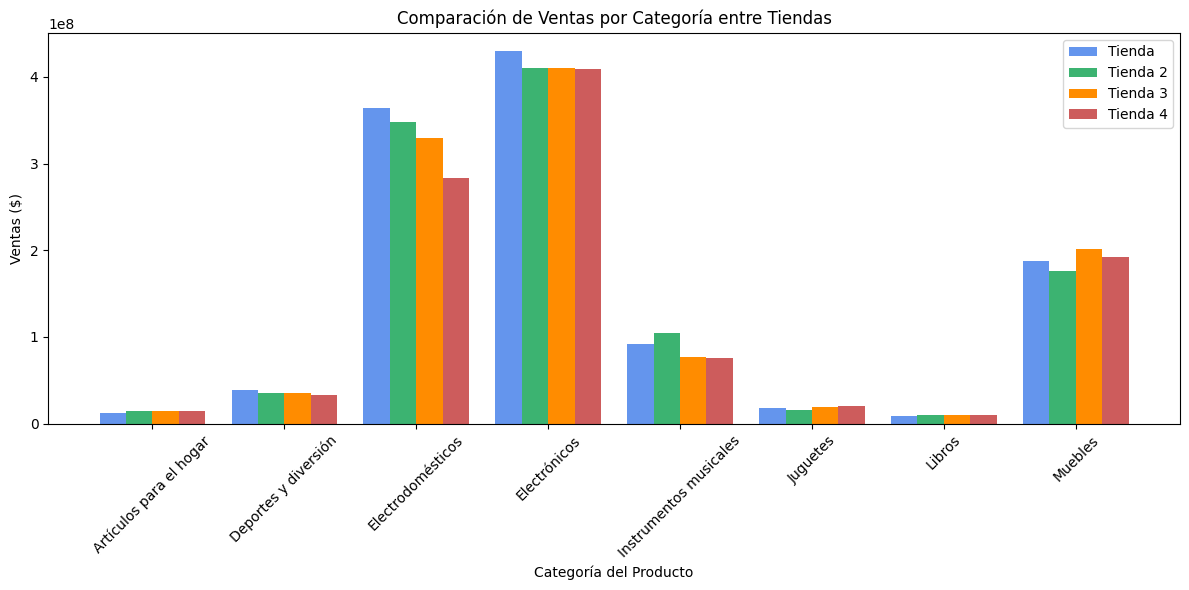

In [ ]:
import numpy as np

# Paso 1: Unificamos todas las categorías posibles
todas_las_categorias = list(set(
    list(ventas_por_categoria.keys()) +
    list(ventas_por_categoria2.keys()) +
    list(ventas_por_categoria3.keys()) +
    list(ventas_por_categoria4.keys())
))
todas_las_categorias.sort()

# Paso 2: Armamos listas de ventas por tienda, en el mismo orden de categorías
ventas1 = []
ventas2 = []
ventas3 = []
ventas4 = []

for categoria in todas_las_categorias:
    ventas1.append(ventas_por_categoria.get(categoria, 0))
    ventas2.append(ventas_por_categoria2.get(categoria, 0))
    ventas3.append(ventas_por_categoria3.get(categoria, 0))
    ventas4.append(ventas_por_categoria4.get(categoria, 0))

# Paso 3: Creamos el gráfico de barras agrupadas
x = np.arange(len(todas_las_categorias))  # posiciones base
ancho = 0.2  # ancho de cada barra

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*ancho, ventas1, width=ancho, label="Tienda", color="cornflowerblue")
plt.bar(x - 0.5*ancho, ventas2, width=ancho, label="Tienda 2", color="mediumseagreen")
plt.bar(x + 0.5*ancho, ventas3, width=ancho, label="Tienda 3", color="darkorange")
plt.bar(x + 1.5*ancho, ventas4, width=ancho, label="Tienda 4", color="indianred")

# Paso 4: Etiquetas y presentación
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas ($)")
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xticks(x, todas_las_categorias, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificacion promedio de la tienda


In [ ]:
print(tienda.columns.tolist())

['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


In [ ]:
# Calificación promedio - Tienda 1
calificaciones = tienda["Calificación"].tolist()

suma_calificaciones = 0
cantidad_calificaciones = 0

for calificacion in calificaciones:
    suma_calificaciones += calificacion
    cantidad_calificaciones += 1

promedio_tienda1 = suma_calificaciones / cantidad_calificaciones
print(f"Satisfacción de los clientes con los productos vendidos muestra una calificación  promedio para la Tienda  igual a: {round(promedio_tienda1, 2)}")


# Calificación promedio - Tienda 2
calificaciones2 = tienda2["Calificación"].tolist()

suma_calificaciones2 = 0
cantidad_calificaciones2 = 0

for calificacion in calificaciones2:
    suma_calificaciones2 += calificacion
    cantidad_calificaciones2 += 1

promedio_tienda2 = suma_calificaciones2 / cantidad_calificaciones2
print(f"Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 2 igual a: {round(promedio_tienda2, 2)}")


# Calificación promedio - Tienda 3
calificaciones3 = tienda3["Calificación"].tolist()

suma_calificaciones3 = 0
cantidad_calificaciones3 = 0

for calificacion in calificaciones3:
    suma_calificaciones3 += calificacion
    cantidad_calificaciones3 += 1

promedio_tienda3 = suma_calificaciones3 / cantidad_calificaciones3
print(f"Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 3 igual a: {round(promedio_tienda3, 2)}")


# Calificación promedio - Tienda 4
calificaciones4 = tienda4["Calificación"].tolist()

suma_calificaciones4 = 0
cantidad_calificaciones4 = 0

for calificacion in calificaciones4:
    suma_calificaciones4 += calificacion
    cantidad_calificaciones4 += 1

promedio_tienda4 = suma_calificaciones4 / cantidad_calificaciones4
print(f"Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 4 igual a: {round(promedio_tienda4, 2)}")


Satisfacción de los clientes con los productos vendidos muestra una calificación  promedio para la Tienda  igual a: 3.98
Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 2 igual a: 4.04
Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 3 igual a: 4.05
Satisfacción de los clientes con los productos vendidos muestra una calificación promedio para la Tienda 4 igual a: 4.0


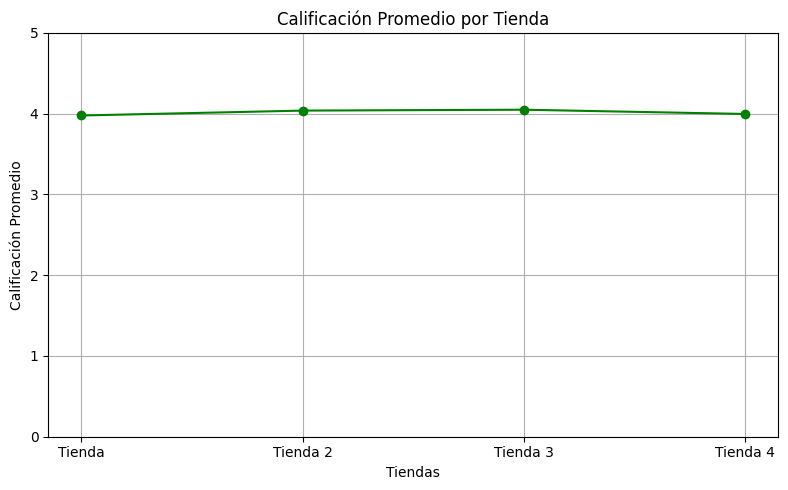

In [ ]:
# Gráfico calificaciones promedio por Tienda
nombres_tiendas = ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones_promedio = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

plt.figure(figsize=(8, 5))
plt.plot(nombres_tiendas, calificaciones_promedio, marker='o', linestyle='-', color='green')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# ------------------ Tienda ------------------
productos = tienda["Producto"].tolist()

ventas_productos = {}

for producto in productos:
    if producto in ventas_productos:
        ventas_productos[producto] += 1
    else:
        ventas_productos[producto] = 1

# Buscar el más vendido y el menos vendido
mas_vendido = ""
menos_vendido = ""
max_ventas = 0
min_ventas = float('inf')

for producto, cantidad in ventas_productos.items():
    if cantidad > max_ventas:
        max_ventas = cantidad
        mas_vendido = producto
    if cantidad < min_ventas:
        min_ventas = cantidad
        menos_vendido = producto

print("Tienda:")
print(f"Producto más vendido: {mas_vendido} ({max_ventas} ventas)")
print(f"Producto menos vendido: {menos_vendido} ({min_ventas} ventas)\n")


# ------------------ Tienda 2 ------------------
productos2 = tienda2["Producto"].tolist()
ventas_productos2 = {}

for producto in productos2:
    if producto in ventas_productos2:
        ventas_productos2[producto] += 1
    else:
        ventas_productos2[producto] = 1

mas_vendido2 = ""
menos_vendido2 = ""
max_ventas2 = 0
min_ventas2 = float('inf')

for producto, cantidad in ventas_productos2.items():
    if cantidad > max_ventas2:
        max_ventas2 = cantidad
        mas_vendido2 = producto
    if cantidad < min_ventas2:
        min_ventas2 = cantidad
        menos_vendido2 = producto

print("Tienda 2:")
print(f"Producto más vendido: {mas_vendido2} ({max_ventas2} ventas)")
print(f"Producto menos vendido: {menos_vendido2} ({min_ventas2} ventas)\n")


# ------------------ Tienda 3 ------------------
productos3 = tienda3["Producto"].tolist()
ventas_productos3 = {}

for producto in productos3:
    if producto in ventas_productos3:
        ventas_productos3[producto] += 1
    else:
        ventas_productos3[producto] = 1

mas_vendido3 = ""
menos_vendido3 = ""
max_ventas3 = 0
min_ventas3 = float('inf')

for producto, cantidad in ventas_productos3.items():
    if cantidad > max_ventas3:
        max_ventas3 = cantidad
        mas_vendido3 = producto
    if cantidad < min_ventas3:
        min_ventas3 = cantidad
        menos_vendido3 = producto

print("Tienda 3:")
print(f"Producto más vendido: {mas_vendido3} ({max_ventas3} ventas)")
print(f"Producto menos vendido: {menos_vendido3} ({min_ventas3} ventas)\n")


# ------------------ Tienda 4 ------------------
productos4 = tienda4["Producto"].tolist()
ventas_productos4 = {}

for producto in productos4:
    if producto in ventas_productos4:
        ventas_productos4[producto] += 1
    else:
        ventas_productos4[producto] = 1

mas_vendido4 = ""
menos_vendido4 = ""
max_ventas4 = 0
min_ventas4 = float('inf')

for producto, cantidad in ventas_productos4.items():
    if cantidad > max_ventas4:
        max_ventas4 = cantidad
        mas_vendido4 = producto
    if cantidad < min_ventas4:
        min_ventas4 = cantidad
        menos_vendido4 = producto

print("Tienda 4:")
print(f"Producto más vendido: {mas_vendido4} ({max_ventas4} ventas)")
print(f"Producto menos vendido: {menos_vendido4} ({min_ventas4} ventas)")


Tienda:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)


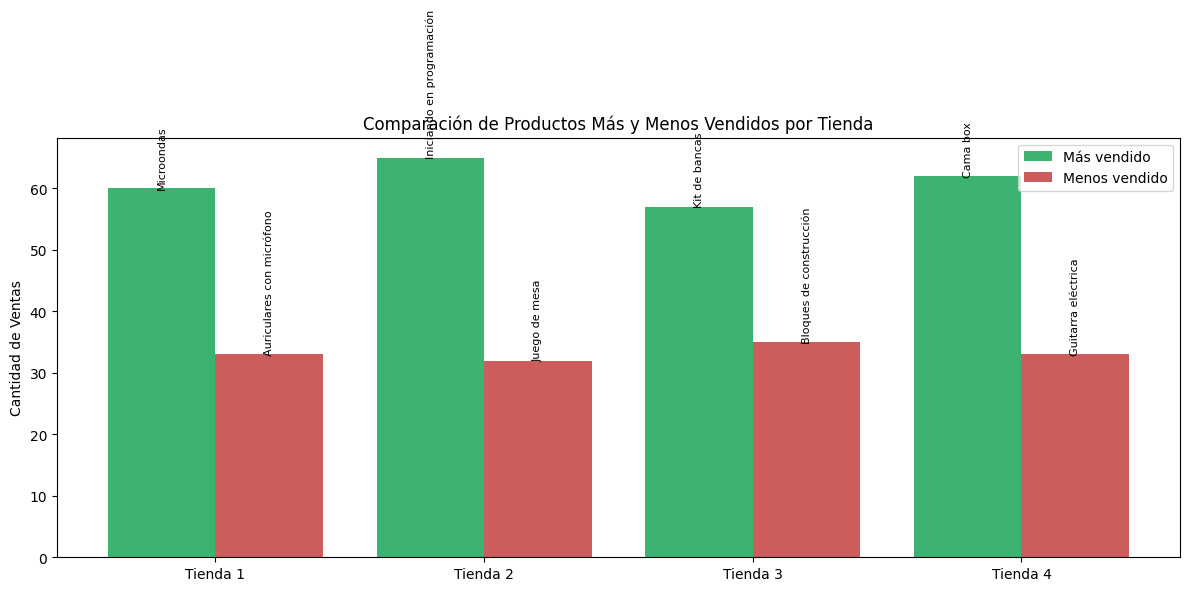

In [ ]:
# Nombres de tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Productos más vendidos y cantidades
productos_mas_vendidos = [mas_vendido, mas_vendido2, mas_vendido3, mas_vendido4]
cantidades_mas_vendidos = [max_ventas, max_ventas2, max_ventas3, max_ventas4]

# Productos menos vendidos y cantidades
productos_menos_vendidos = [menos_vendido, menos_vendido2, menos_vendido3, menos_vendido4]
cantidades_menos_vendidos = [min_ventas, min_ventas2, min_ventas3, min_ventas4]

# Crear gráfico
x = range(len(tiendas))
ancho_barra = 0.4

plt.figure(figsize=(12, 6))

# Barras para productos más vendidos
plt.bar([i - ancho_barra/2 for i in x], cantidades_mas_vendidos, width=ancho_barra, color="mediumseagreen", label="Más vendido")

# Barras para productos menos vendidos
plt.bar([i + ancho_barra/2 for i in x], cantidades_menos_vendidos, width=ancho_barra, color="indianred", label="Menos vendido")

# Agregar etiquetas
plt.xticks(x, tiendas)
plt.ylabel("Cantidad de Ventas")
plt.title("Comparación de Productos Más y Menos Vendidos por Tienda")
plt.legend()

# Mostrar los nombres de productos en las barras
for i in range(len(tiendas)):
    plt.text(i - ancho_barra/2, cantidades_mas_vendidos[i] + 0.2, productos_mas_vendidos[i], ha='center', fontsize=8, rotation=90)
    plt.text(i + ancho_barra/2, cantidades_menos_vendidos[i] + 0.2, productos_menos_vendidos[i], ha='center', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Tienda
envios = tienda["Costo de envío"].tolist()

suma_envios = 0
cantidad_envios = 0

for costo in envios:
    suma_envios += costo
    cantidad_envios += 1

promedio_envio = suma_envios / cantidad_envios
print(f"Costo  de envío  promedio - Tienda: ${round(promedio_envio, 2)}")


# Tienda 2
envios2 = tienda2["Costo de envío"].tolist()

suma_envios2 = 0
cantidad_envios2 = 0

for costo in envios2:
    suma_envios2 += costo
    cantidad_envios2 += 1

promedio_envio2 = suma_envios2 / cantidad_envios2
print(f"Costo de envío promedio - Tienda 2: ${round(promedio_envio2, 2)}")


# Tienda 3
envios3 = tienda3["Costo de envío"].tolist()

suma_envios3 = 0
cantidad_envios3 = 0

for costo in envios3:
    suma_envios3 += costo
    cantidad_envios3 += 1

promedio_envio3 = suma_envios3 / cantidad_envios3
print(f"Costo de envío promedio - Tienda 3: ${round(promedio_envio3, 2)}")


# Tienda 4
envios4 = tienda4["Costo de envío"].tolist()

suma_envios4 = 0
cantidad_envios4 = 0

for costo in envios4:
    suma_envios4 += costo
    cantidad_envios4 += 1

promedio_envio4 = suma_envios4 / cantidad_envios4
print(f"Costo de envío promedio - Tienda 4: ${round(promedio_envio4, 2)}")


Costo  de envío  promedio - Tienda: $26018.61
Costo de envío promedio - Tienda 2: $25216.24
Costo de envío promedio - Tienda 3: $24805.68
Costo de envío promedio - Tienda 4: $23459.46


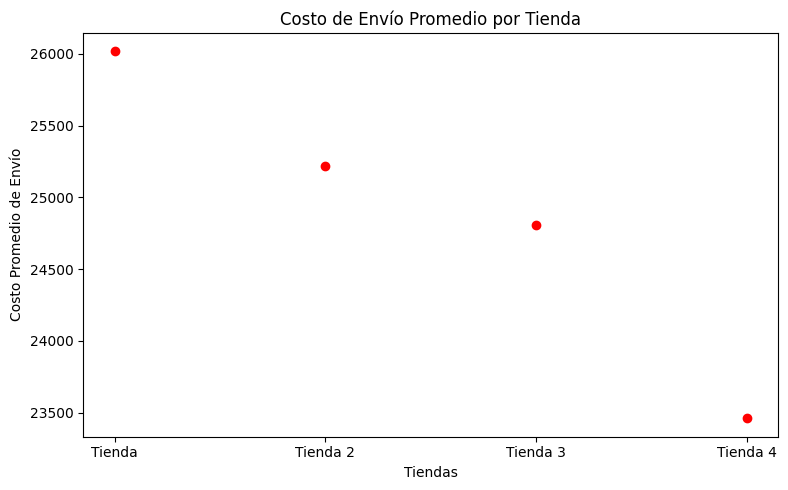

In [ ]:
# Gráfico de Costo de Envío por Tienda

costos_envio = [promedio_envio, promedio_envio2, promedio_envio3, promedio_envio4]

plt.figure(figsize=(8, 5))
plt.scatter(nombres_tiendas, costos_envio, color='red')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio de Envío')
plt.tight_layout()
plt.show()


# Informe final: Relatorio – Justificación de venta de la Tienda 4

**Análisis Final: Decisión de Venta**

Luego de un análisis comparativo entre las cuatro tiendas en operación, se han evaluado diversos indicadores clave que permiten fundamentar la decisión estratégica de vender una de ellas.

**1. Ingresos Totales:**  
Tienda 4 presenta los ingresos más bajos entre todas, alcanzando \$1.038.375.700. Esta cifra está significativamente por debajo de Tienda 1, que lidera con más de \$1.150 millones, lo que representa una diferencia superior a \$112 millones.

**2. Calificación Promedio de Clientes:**  
Aunque Tienda 4 mantiene una calificación positiva (4.00), se encuentra por debajo de Tienda 2 (4.04) y Tienda 3 (4.05), reflejando una menor satisfacción por parte de sus clientes.

**3. Costo de Envío Promedio:**  
Si bien Tienda 4 tiene el costo de envío más bajo (\$23.459,46), esta ventaja no ha sido suficiente para mejorar su volumen de ventas ni su rentabilidad general.

**4. Ventas por Producto:**  
El producto más vendido en Tienda 4 fue **Cama box** (62 unidades), mientras que el menos vendido fue **Guitarra eléctrica** (33 unidades). Esta tienda no presenta productos ancla con alta rotación o rentabilidad destacada, lo que debilita su posición competitiva.

**Conclusión:**  
Considerando la menor rentabilidad, una calificación ligeramente inferior y un desempeño de ventas limitado, se concluye que **Tienda 4 es la mejor opción para ser vendida**. Esta decisión permitirá enfocar recursos y estrategias en tiendas con mayor proyección de crecimiento y resultados más sólidos.


## ¡Extra! Análisis del desempeño geográfico

In [4]:
import plotly.express as px

# Uno todas las Tiendas
df_all = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Mapa interactivo con plotly
fig = px.scatter_geo(
    df_all,
    lat='lat',
    lon='lon',
    color='Precio',
    size='Precio',
    hover_name='Producto',
    hover_data=['Categoría del Producto', 'Lugar de Compra', 'Precio'],
    color_continuous_scale='Viridis',
    projection='natural earth',
    title='Mapa interactivo de ventas por tienda (según precio)'
)

fig.update_geos(
    center=dict(lat=-15, lon=-60),  # Centro aproximado de Sudamérica
    projection_scale=3  # Aumenta este valor para acercar el mapa
)

fig.show()

### Resultados del análisis geográfico
*  Tienda:   tiene el mayor total de ingresos y buena dispersión → Líder actual.

* Tienda 2: tiene muchas ventas a bajo precio → ideal para estrategias de volumen.

* Tienda 3: destaca por precios más altos en menor volumen → buena para modelo premium.

* Tienda 4: tiene bajo rendimiento en todas las métricas → necesita revisión.